In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import nltk

In [2]:
#nltk.download('all')

In [6]:
# Get local path of data
path = os.path.abspath(os.getcwd())
path = os.path.abspath(os.path.join(path, os.pardir)) + '\\airbnb-listings.json'
path

'c:\\Users\\quynt\\Documents\\Project_DA\\airbnb-listings.json'

In [7]:
df = pd.read_json(path)

In [8]:
x =df['fields']
rows = len(x)
facets = ['id',
 'latitude',
 'longitude',
 'name',
 'host_id',
 'host_name',
 'host_response_time',
 'host_response_rate',
 'city',
 'country',
 'property_type',
 'room_type',
 'bed_type',
 'neighbourhood_cleansed',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'extra_people',
 'price',
 'cleaning_fee',
 'cancellation_policy',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'review_scores_value',
 'review_scores_cleanliness',
 'review_scores_accuracy',
 'calculated_host_listings_count',
 'amenities',
 'features',
 'host_url']

In [9]:
x_records = []
for row in range(0,rows):
      data = x[row]
      x_records.append(data)

for ele in x_records:
    for f in facets:
        if f not in ele.keys():
            ele[f] = None

df2 = pd.DataFrame(x_records,columns=facets)
df2

,id,latitude,longitude,name,host_id,host_name,host_response_time,host_response_rate,city,country,...,maximum_nights,number_of_reviews,reviews_per_month,review_scores_value,review_scores_cleanliness,review_scores_accuracy,calculated_host_listings_count,amenities,features,host_url
0,4008728,52.36523660409065,4.878249575101092,"Luxurious 3 bedroom, centrum, 180m2",20786453,Lithal,within a day,50.0,Amsterdam,Netherlands,...,1125.0,31.0,1.52,9.0,8.0,9.0,1.0,"TV,Internet,Wireless Internet,Kitchen,Pets all...","Host Has Profile Pic,Host Identity Verified,Is...",https://www.airbnb.com/users/show/20786453
1,7778612,52.367309030897516,4.8738407410699915,Luxury apartment in city centre,11964927,Hein,within a few hours,100.0,Amsterdam,Netherlands,...,1125.0,15.0,0.81,9.0,9.0,9.0,1.0,"TV,Cable TV,Internet,Wireless Internet,Kitchen...","Host Is Superhost,Host Has Profile Pic,Host Id...",https://www.airbnb.com/users/show/11964927
2,8264596,52.361943953804776,4.866686522141489,Cosy apartment across Vondelpark,23669273,Matthieu,None,NaN,Amsterdam,Netherlands,...,1125.0,1.0,0.05,10.0,10.0,10.0,1.0,"TV,Cable TV,Internet,Wireless Internet,Kitchen...","Host Has Profile Pic,Host Identity Verified,Is...",https://www.airbnb.com/users/show/23669273
3,2180729,52.37014616115532,4.866281767968382,Spacious City Apartment Oud-West,9238680,Bas,within a day,100.0,Amsterdam,Netherlands,...,30.0,22.0,0.62,9.0,9.0,10.0,1.0,"TV,Cable TV,Internet,Wireless Internet,Kitchen...","Host Has Profile Pic,Host Identity Verified,Is...",https://www.airbnb.com/users/show/9238680
4,14463171,52.368817829014425,4.871249476925455,Cosy Studio Apartment Center Amsterdam,89112644,Pablo,within a day,100.0,Amsterdam,Netherlands,...,1125.0,16.0,2.04,9.0,8.0,8.0,1.0,"TV,Wireless Internet,Kitchen,Heating,Smoke det...",Host Has Profile Pic,https://www.airbnb.com/users/show/89112644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494949,1150181,52.41823277406404,13.724483982850774,rlaub im grünen Umland von Berlin,6304086,Mechthild,None,NaN,Berlin,Germany,...,5.0,0.0,NaN,NaN,NaN,NaN,1.0,None,"Host Has Profile Pic,Is Location Exact",https://www.airbnb.com/users/show/6304086
494950,8699527,52.52811601427975,13.46193763388039,Big bright room in a good location for tavellers,2989041,Nikita,within an hour,100.0,Berlin,Germany,...,1125.0,6.0,0.54,9.0,9.0,10.0,1.0,"Internet,Wireless Internet,Kitchen,Smoking all...","Host Has Profile Pic,Host Identity Verified",https://www.airbnb.com/users/show/2989041
494951,16881873,52.523728272656875,13.474912706162689,Room for rent,91183137,Muhammad,within a day,100.0,Berlin,Germany,...,1125.0,1.0,0.35,8.0,10.0,10.0,1.0,"Smoking allowed,translation missing: en.hostin...",Host Has Profile Pic,https://www.airbnb.com/users/show/91183137
494952,18046299,52.49699434496886,13.497096400008651,Privatzimmer in grünen und ruhigen herzen Berlins,33062083,Jonas,within an hour,100.0,Berlin,Germany,...,1125.0,2.0,2.00,10.0,10.0,10.0,1.0,"TV,Internet,Wireless Internet,Kitchen,Free par...","Host Has Profile Pic,Host Identity Verified,Is...",https://www.airbnb.com/users/show/33062083


In [10]:
nan_list = df2.isna().sum().to_numpy()
nan_idx = []
for i in range(len(nan_list)):
  if nan_list[i] > 0:
    tmp = []
    tmp.append(df2.keys()[i])
    tmp.append(df2[df2.keys()[i]].dtypes)
    tmp.append(nan_list[i])
    tmp.append(round(nan_list[i]/df2.shape[0] *100,2))
    nan_idx.append(tmp)
df3 = pd.DataFrame(nan_idx, columns = ["col_name","type","nan_amount","%"])
df3

,col_name,type,nan_amount,%
0,latitude,object,1,0.00
1,longitude,object,1,0.00
2,name,object,418,0.08
3,host_name,object,504,0.10
4,host_response_time,object,115069,23.25
5,host_response_rate,float64,115070,23.25
6,city,object,453,0.09
7,country,object,3,0.00
8,property_type,object,11,0.00
9,room_type,object,1,0.00


## Data Preprosessing

### Hiệu

In [11]:
## Hiệu
df2 = df2.dropna(subset=["accommodates", "bathrooms", "bedrooms", "beds", "extra_people","property_type"])
df2 = df2.drop("cleaning_fee",axis=1)

### Quí

In [12]:
## Quí
df2['host_response_rate'] = df2['host_response_rate'].fillna(0)

df2[['host_response_time','amenities','features']] = df2[['host_response_time','amenities','features']].fillna("Not Avaialble")

### Trí

In [13]:
cols = ['review_scores_cleanliness','review_scores_value','review_scores_accuracy','reviews_per_month']
nan_idx = list(df2[cols][df2['reviews_per_month'].isnull()].index)
df2[cols][df2['reviews_per_month'].isnull()]

,review_scores_cleanliness,review_scores_value,review_scores_accuracy,reviews_per_month
12,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN
34,NaN,NaN,NaN,NaN
...,...,...,...,...
494928,NaN,NaN,NaN,NaN
494933,NaN,NaN,NaN,NaN
494934,NaN,NaN,NaN,NaN
494946,NaN,NaN,NaN,NaN


In [14]:
df2[cols].std()

review_scores_cleanliness    1.034973
review_scores_value          0.903267
review_scores_accuracy       0.852054
reviews_per_month            1.733576
dtype: float64

Những cột này đều có điểm chung là không có các thông số review nên không hợp lý khi ta xử lý các Nan values này một cách quá tùy tiện như thay thế bằng mod, median, mean,... Vì vậy, ta có thể xem như các ngôi nhà ở đây chưa được review trong khi thu nhập dữ liệu và điền các missing value = 0. Trong khi những cột còn lại độ lệch chuẩn không cao, khoảng 1.

In [15]:
mask = df2['reviews_per_month'].isna()
df2.loc[mask,cols] = 0

In [16]:
df2[cols][df2['review_scores_cleanliness'].isnull() & df2['review_scores_value'].isnull() & df2['review_scores_accuracy'].isnull()]

,review_scores_cleanliness,review_scores_value,review_scores_accuracy,reviews_per_month
381,NaN,NaN,NaN,0.94
455,NaN,NaN,NaN,0.10
502,NaN,NaN,NaN,0.15
512,NaN,NaN,NaN,0.28
550,NaN,NaN,NaN,0.71
...,...,...,...,...
494172,NaN,NaN,NaN,0.14
494181,NaN,NaN,NaN,0.04
494182,NaN,NaN,NaN,0.03
494525,NaN,NaN,NaN,0.10


In [17]:
df2 = df2.dropna(subset=['review_scores_accuracy','review_scores_value'],how='all')
df2 = df2.dropna(subset=['review_scores_cleanliness','review_scores_value'],how='all')
df2 = df2.dropna(subset=['review_scores_accuracy','review_scores_cleanliness'],how='all')
df2 = df2.reset_index(drop=True)

## Exploratory Data Analysis

Câu hỏi:


### Quí

,host_name,calculated_host_listings_count
735,Tom,711.0
778,Tom,711.0
792,Tom,711.0
816,Tom,711.0
858,Tom,711.0
...,...,...
480613,Tom,711.0
480653,Tom,711.0
480853,Tom,711.0
481314,Tom,711.0


In [130]:
city_price = df2[['city',
                'price']].groupby('city').mean()\
.sort_values('price',ascending=False).head(20)
city_price

,price
city,
1366,993.0
Siu Sai Wan,993.0
"Islands brygge, København",993.0
"Clontarf, Sydney",991.0
天后,985.0
Mongkok / Yau Ma Tei,977.0
OLYPMIC,977.0
Son Veri,957.0
Frederiksberg/ Copenhagen,954.0


In [132]:
df_city = df2[df2['city'].isin(city_price.index)]
df_city

,id,latitude,longitude,name,host_id,host_name,host_response_time,host_response_rate,city,country,...,maximum_nights,number_of_reviews,reviews_per_month,review_scores_value,review_scores_cleanliness,review_scores_accuracy,calculated_host_listings_count,amenities,features,host_url
55103,14230987,55.70166227922335,12.581999833085685,"Large bright apartment, Østerbro",25428771,Philip,within an hour,100.0,østerbro,Denmark,...,1125.0,5.0,0.61,10.0,10.0,10.0,1.0,"TV,Internet,Wireless Internet,Kitchen,Buzzer/w...","Host Has Profile Pic,Instant Bookable",https://www.airbnb.com/users/show/25428771
62203,13261091,55.66165655488944,12.571795608853028,Close to water and the city center. Islands br...,17387814,Jens,Not Avaialble,0.0,"Islands brygge, København",Denmark,...,8.0,0.0,0.00,0.0,0.0,0.0,1.0,"TV,Wireless Internet,Kitchen,Heating,Family/ki...","Host Has Profile Pic,Is Location Exact",https://www.airbnb.com/users/show/17387814
135403,5611767,22.244652881866187,114.1594383529925,Apartment with panoramic sea views,29090719,Greg,within an hour,100.0,"Ap Lei Chau,",Hong Kong,...,1125.0,0.0,0.00,0.0,0.0,0.0,1.0,"TV,Wireless Internet,Air Conditioning,Pool,Kit...","Host Has Profile Pic,Host Identity Verified,Is...",https://www.airbnb.com/users/show/29090719
135460,4400940,22.270220592184693,113.99988448081268,Thai style double bed room Mui wo,7842633,Chu,within a few hours,100.0,Hkg,Hong Kong,...,1125.0,5.0,0.28,6.0,8.0,8.0,4.0,"TV,Wireless Internet,Air Conditioning,Breakfas...","Host Has Profile Pic,Require Guest Profile Pic...",https://www.airbnb.com/users/show/7842633
154700,3254558,55.68686567643156,12.535427028591947,Great location! family friendly!,16460047,Kathe,Not Avaialble,0.0,Frederiksberg/ Copenhagen,Denmark,...,1125.0,4.0,0.16,10.0,10.0,10.0,1.0,"TV,Cable TV,Internet,Wireless Internet,Kitchen...","Host Has Profile Pic,Is Location Exact",https://www.airbnb.com/users/show/16460047
177907,4624359,-33.80970798813508,151.2596898649443,Modern home above Castle rock beach,23407096,Michael.,Not Avaialble,0.0,"Clontarf, Sydney",Australia,...,1125.0,0.0,0.00,0.0,0.0,0.0,1.0,"TV,Cable TV,Kitchen,Free parking on premises,H...","Host Has Profile Pic,Is Location Exact",https://www.airbnb.com/users/show/23407096
205052,284261,22.267931445452078,114.2432375596041,Sea view industrial loft,1480659,Paola,within an hour,100.0,Siu Sai Wan,Hong Kong,...,20.0,3.0,0.17,9.0,9.0,9.0,1.0,"TV,Internet,Wireless Internet,Air Conditioning...","Host Has Profile Pic,Is Location Exact",https://www.airbnb.com/users/show/1480659
205066,13949936,22.375624637207615,114.27179774890786,Village Home with Seaview 10min walk from Sai ...,35263437,Belinda,within an hour,100.0,西貢,Hong Kong,...,30.0,5.0,5.00,10.0,10.0,10.0,1.0,"TV,Wireless Internet,Air Conditioning,Pets All...","Host Has Profile Pic,Host Identity Verified",https://www.airbnb.com/users/show/35263437
205785,4665859,55.68576576165886,12.5560689954889,"Cozy, functional apartment in central Copenhagen",24111304,Anton,within a day,90.0,København. N,Denmark,...,1125.0,23.0,1.84,9.0,9.0,10.0,1.0,"TV,Internet,Wireless Internet,Kitchen,Smoking ...","Host Has Profile Pic,Host Identity Verified",https://www.airbnb.com/users/show/24111304
209511,15155771,39.76892709138004,2.709879861516171,Finca Paulo - Sóller,96145168,Fincahit,within a day,100.0,Sollér,Spain,...,1125.0,0.0,0.00,0.0,0.0,0.0,74.0,"TV,Cable TV,Internet,Wireless Internet,Air con...","Host Has Profile Pic,Requires License,Instant ...",https://www.airbnb.com/users/show/96145168


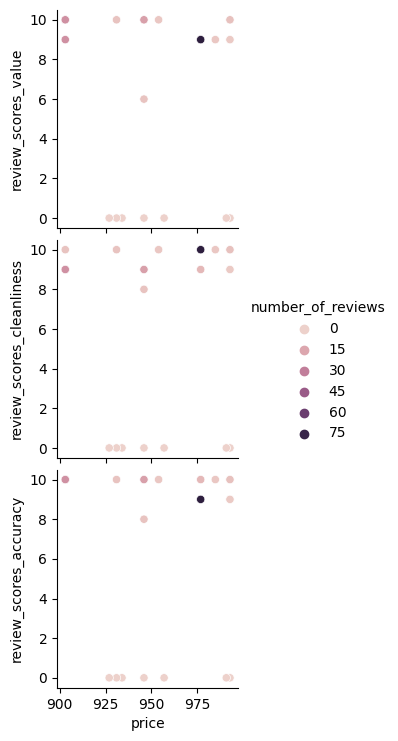

In [133]:
sns.pairplot(df_city, x_vars='price', y_vars=['review_scores_value', 'review_scores_cleanliness', 'review_scores_accuracy'], hue='number_of_reviews')

c:\Users\quynt\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from current font.
  fig.canvas.draw()
c:\Users\quynt\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 36002 (\N{CJK UNIFIED IDEOGRAPH-8CA2}) missing from current font.
  fig.canvas.draw()
c:\Users\quynt\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from current font.
  fig.canvas.draw()
c:\Users\quynt\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from current font.
  fig.canvas.draw()


C:\Users\quynt\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from current font.
  func(*args, **kwargs)
C:\Users\quynt\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 36002 (\N{CJK UNIFIED IDEOGRAPH-8CA2}) missing from current font.
  func(*args, **kwargs)
C:\Users\quynt\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from current font.
  func(*args, **kwargs)
C:\Users\quynt\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from current font.
  func(*args, **kwargs)
C:\Users\quynt\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from current font.
  fig.canvas.print_figure(byt

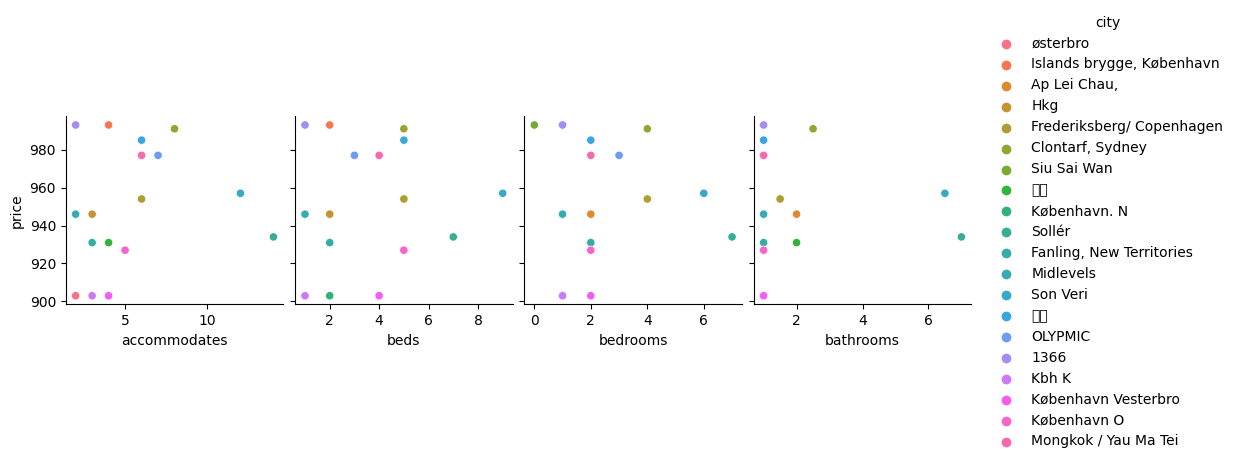

In [139]:
sns.pairplot(df_city, x_vars=['accommodates','beds', 'bedrooms', 'bathrooms'], y_vars='price', hue='city')

### Hiệu

In [45]:
df2[['host_id','host_name','calculated_host_listings_count']].groupby(['host_id','host_name']).mean()\
.sort_values('calculated_host_listings_count',ascending=False).head(5)

,,calculated_host_listings_count
host_id,host_name,
3625030,Angela,752.000000
33889201,Tom,711.000000
43337979,Top Villas Mallorca,224.000000
80636743,Foravila,193.000000
7409213,Lisa L'Abode Accommodation,154.980263
